<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>

In [26]:
# Data Manipulation
import pandas as pd        
import numpy as np  

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Model Selection and Metrics
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Imbalanced Dataset Handling
from imblearn.under_sampling import RandomUnderSampler  

# Deep Learning (TensorFlow and Keras)
import tensorflow as tf                               
import tensorflow as tfr
from tensorflow.keras.utils import to_categorical     
from keras import layers      
from keras.layers import LeakyReLU                    
from tensorflow.keras.callbacks import EarlyStopping  
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras import layers, regularizers
from keras.optimizers import SGD
import keras
from keras_tuner import RandomSearch

# Hyperparameter Tuning
import keras_tuner  

# Feature Selection
from skfeature.function.similarity_based import fisher_score 
from sklearn.feature_selection import SelectKBest, chi2

# Dataset Creation and Resampling
from sklearn.utils import resample 
from sklearn.datasets import make_classification 

# Multicollinearity and Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Save and load models, scalers
import joblib 

# Load pre-trained Keras models
from keras.models import load_model         

<div style="background-color:#eef9f1; border-left: 6px solid #8bc34a; padding: 10px;">
    <h3 style="color:#8bc34a;">Peronal Analysis about three Classification models</h3>
    <p style="font-size: 14px; color:#333;"> After working with ANN classification, Random forest and XGBoot, all models have great performance. All models are perfect to detect the star. Randomforest is a bite better for predicting correctly Galaxy than others. All model have the almost same result for QSO. </p>
</div>

In [27]:
# Using GPU in PyTorch
# Check if CUDA is available and set the device
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print("Using device:", device)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Loading and Exploring the dataset
</h1>

In [98]:
#Load the dataset
df = pd.read_csv('star_classification.csv')

In [29]:

df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,301,2,79,6543777369295181824.00,GALAXY,0.63,5812,56354,171
1,1237664879951151104.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,301,5,119,11760142036707334144.00,GALAXY,0.78,10445,58158,427
2,1237660961330430208.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,301,2,120,5152200256025548800.00,GALAXY,0.64,4576,55592,299
3,1237663478724297984.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,301,3,214,10301071412954419200.00,GALAXY,0.93,9149,58039,775
4,1237680272041378048.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,301,3,137,6891864880783316992.00,GALAXY,0.12,6121,56187,842
5,1237680272039609088.00,341.00,20.59,23.49,23.34,21.32,20.26,19.55,8102,301,3,110,5658976714552007680.00,QSO,1.42,5026,55855,741
6,1237678858481565952.00,23.23,11.42,21.47,21.18,20.93,20.61,20.43,7773,301,2,462,12462617271914000384.00,QSO,0.59,11069,58456,113
7,1237678858473963520.00,5.43,12.07,22.25,22.02,20.34,19.49,18.85,7773,301,2,346,6961443351364392960.00,GALAXY,0.48,6183,56210,15
8,1237661435386659840.00,200.29,47.20,24.40,22.36,20.61,19.46,18.96,3716,301,5,108,7459284627188110336.00,GALAXY,0.66,6625,56386,719
9,1237670961088167936.00,39.15,28.10,21.75,20.03,19.18,18.82,18.65,5934,301,4,122,2751763212482406400.00,STAR,-0.00,2444,54082,232


In [30]:
df.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1237678879964201472.00,39.62,-2.59,22.17,22.98,21.90,21.31,20.74,7778,301,2,581,10554306253273999360.00,GALAXY,0.00,9374,57749,438
99996,1237679476408647936.00,29.49,19.80,22.69,22.39,20.45,19.76,19.42,7917,301,1,289,8586350850183813120.00,GALAXY,0.40,7626,56934,866
99997,1237668298220634368.00,224.59,15.70,21.17,19.27,18.20,17.69,17.35,5314,301,4,308,3112007759562827776.00,GALAXY,0.14,2764,54535,74
99998,1237661151383454208.00,212.27,46.66,25.35,21.64,19.91,19.07,18.62,3650,301,4,131,7601079570549462016.00,GALAXY,0.46,6751,56368,470
99999,1237661151378801152.00,196.90,49.46,22.62,21.80,20.60,20.01,19.28,3650,301,4,60,8343152349989327872.00,GALAXY,0.54,7410,57104,851


In [31]:
# Check for missing values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [32]:
# Check the data types
df.dtypes


obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [33]:
# Check the duplicates

df.duplicated().sum()

0

In [34]:
# Check the statistical summary

df.describe()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,1237664721814903296.00,177.63,24.14,21.98,20.53,19.65,19.08,18.67,4481.37,301.00,3.51,186.13,5783882297552056320.00,0.58,5137.01,55588.65,449.31
std,8438559894562.57,96.50,19.64,31.77,31.75,1.85,1.76,31.73,1964.76,0.00,1.59,149.01,3324016169583858176.00,0.73,2952.30,1808.48,272.50
min,1237645942904389888.00,0.01,-18.79,-9999.00,-9999.00,9.82,9.47,-9999.00,109.00,301.00,1.00,11.00,299519089380976640.00,-0.01,266.00,51608.00,1.00
25%,1237659161195119360.00,127.52,5.15,20.35,18.97,18.14,17.73,17.46,3187.00,301.00,2.00,82.00,2844137590766986752.00,0.05,2526.00,54234.00,221.00
50%,1237663463144292864.00,180.90,23.65,22.18,21.10,20.13,19.41,19.00,4188.00,301.00,4.00,146.00,5614883135353542656.00,0.42,4987.00,55868.50,433.00
75%,1237668350286447104.00,233.90,39.90,23.69,22.12,21.04,20.40,19.92,5326.00,301.00,5.00,241.00,8332144107427485696.00,0.70,7400.25,56777.00,645.00
max,1237680531356386304.00,360.00,83.00,32.78,31.60,29.57,32.14,29.38,8162.00,301.00,6.00,989.00,14126940609093851136.00,7.01,12547.00,58932.00,1000.00


In [35]:
# Check the details of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Visualization of the dataset
</h1>

C:\Users\murta\AppData\Local\Temp\ipykernel_14004\3950156790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


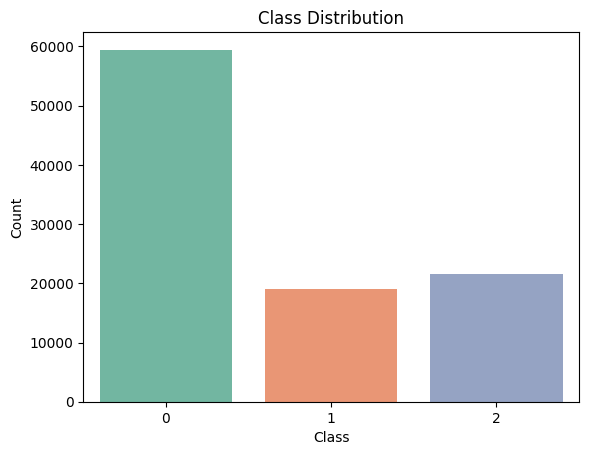

In [115]:
# Check the class distribution
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">As you can see, the target values (class) are imbalanced, which might affect the accuracy and performance of the model. Therefore, I will need to use a balancing method for the class values.</p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Data Preprocessing
</h1>

In [37]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,301,2,79,6543777369295181824.00,GALAXY,0.63,5812,56354,171
1,1237664879951151104.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,301,5,119,11760142036707334144.00,GALAXY,0.78,10445,58158,427
2,1237660961330430208.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,301,2,120,5152200256025548800.00,GALAXY,0.64,4576,55592,299
3,1237663478724297984.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,301,3,214,10301071412954419200.00,GALAXY,0.93,9149,58039,775
4,1237680272041378048.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,301,3,137,6891864880783316992.00,GALAXY,0.12,6121,56187,842


In [99]:
# let's remove some columns from the dataset that are not useful and do not make sense in the dataset.
df.drop(["obj_ID", "run_ID", "rerun_ID", "field_ID", "spec_obj_ID", "fiber_ID"], axis=1, inplace=True)

In [100]:
# Get the value counts of the 'class' column
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [101]:
# Convert the 'class' column to numerical values with LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

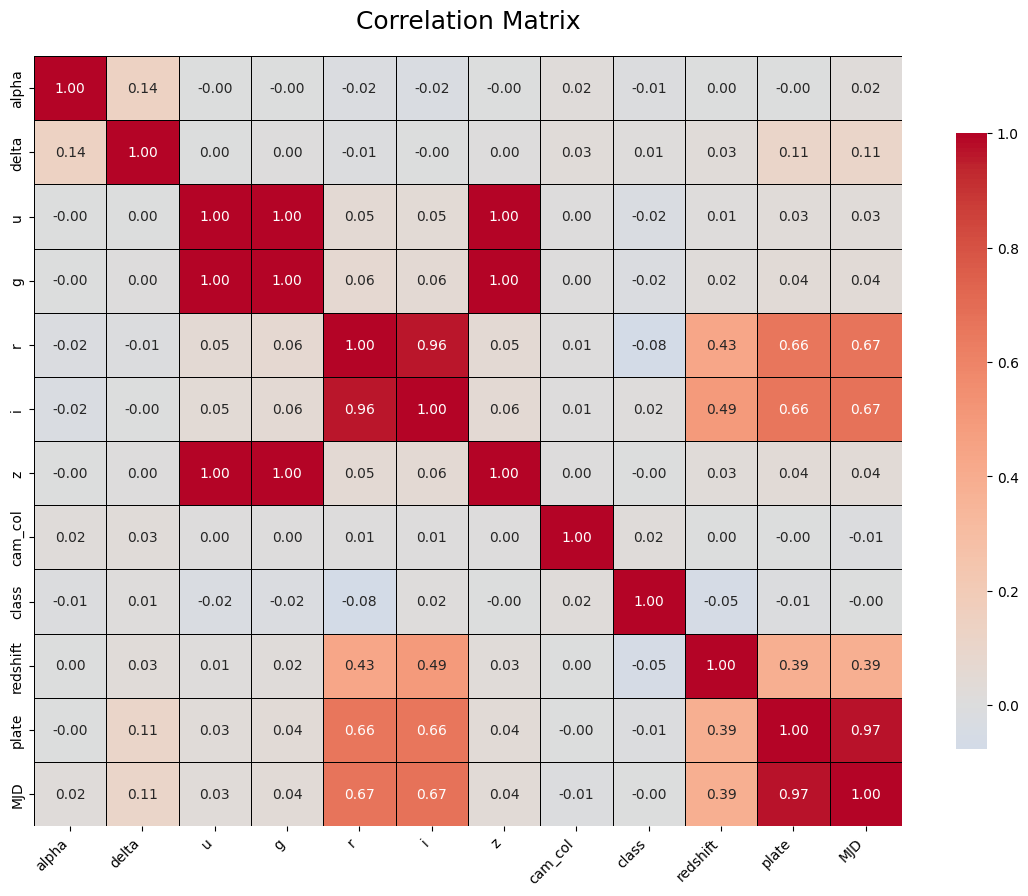

In [41]:
# Correlation Matrix Visualization
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', fmt=".2f", cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=18, pad=20)
plt.show()

<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;"> Photometric Filters: u, g, r, i, z columns have high correlation</p>
    <p style="font-size: 14px; color:#333;"> Columns plate and MJD have high correlation with r and i photometric filter values</p>
    <p style="font-size: 14px; color:#333;"> Columns plate and MJD are highly correlated </p>
    <p style="font-size: 14px; color:#333;"> Columns  redshift has high correlation with i and r.</p>
     <p style="font-size: 14px; color:#333;"> Columns  plate and MJD have a high correlation with redshift.</p>
</div>


In [102]:
# using the variance inflation factor (VIF) to check for multicollinearity in the dataset
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,feature,VIF
0,alpha,4.49
1,delta,2.63
2,u,1279.15
3,g,4116.66
4,r,3758.58
5,i,3817.36
6,z,2265.22
7,cam_col,5.90
8,class,2.06
9,redshift,2.36


<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;"> VIF values shows significant multicollinearnity problems, especially for the photometric filters(u,g, r, i, z) and MJD, I will  combine all photometric filters but before that,  I need to find their outliers </p>
</div>

In [103]:
# Detecting outliers using the IQR method for 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
alpha,0
delta,0
u,56
g,99
r,132
i,198
z,320
cam_col,0
class,0
redshift,8990


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">All the photometric values have noticeable numbers outliers but redshift has extreme number of outliers</p>
</div>


In [104]:
# let's handle the photometric data columns (u, g, r, i, z) by replacing the outliers with the median value

for col in df[['u', 'g', 'r', 'i', 'z']]:
    median = df[col].median()
    df[col] = np.where(df[col] > (Q3[col] + 1.5 * IQR[col]), median, df[col])
    df[col] = np.where(df[col] < (Q1[col] - 1.5 * IQR[col]), median, df[col])

# Check the outliers after handling
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
cam_col,0
class,0
redshift,8990


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">I handled  the photometric data columns (u, g, r, i, z) by replacing the outliers with the median values.  For redshift column, I can not use the replacing the outliers with the median value method because it has  extreme outliers.</p>
</div>

In [105]:
# Calculate the 5th and 95th percentiles of the redshift outliers
lower_bound = df["redshift"].quantile(0.05)
upper_bound = df["redshift"].quantile(0.95)

# Cap the outliers
df["redshift"] = df["redshift"].clip(lower=lower_bound, upper=upper_bound)

# Check the redshift outliers after handling the outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers


,Outliers
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
cam_col,0
class,0
redshift,8990


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3> 
    <p style="font-size: 14px; color:#333;"> I used here cap outliers method to treat redshift's outliers, even  the lower bound is 5% and upper bound is 95%, but outliers are not removed. When the lower bound is 10% and upper bound is 90%, the outliers can be handled. I think 10% and 90% to cap outliers has negative effect on the redshift column. Please tell me, what method could be best way for treating the extreme outliers</p>
</div>

In [106]:
# let's check the all photometric  columns which have high correlation with each other after handling the outliers
df[['u', 'g', 'r', 'i', 'z']].describe()

,u,g,r,i,z
count,100000.00,100000.00,100000.00,100000.00,100000.00
mean,22.08,20.64,19.65,19.09,18.78
std,2.24,2.02,1.84,1.73,1.74
min,15.35,14.24,13.78,13.74,13.77
25%,20.36,18.97,18.15,17.75,17.49
50%,22.18,21.10,20.13,19.41,19.00
75%,23.69,22.12,21.04,20.39,19.92
max,28.62,26.82,25.38,24.39,23.60


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3> 
    <p style="font-size: 14px; color:#333;"> These column have high correlation with each other and the multicollinearity can effect on th model performance so I have to create a column for them by their sum/mean, Weighted average and PCA.  I searched on the internet that weighted average is better specially if one of them has significant impact on the class's values. so I try to use chi-squared scores to find importance of photometric filters columns
</div>

In [107]:
# Create X and y
X = df.drop("class", axis = 1)
y= df["class"]



In [108]:
# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)


,Features,Score
9,plate,15899191.66
10,MJD,478633.19
8,redshift,86147.78
1,delta,6229.70
6,z,2833.64
5,i,2325.27
0,alpha,2304.28
2,u,1801.37
4,r,1487.11
3,g,1388.86


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3> 
    <p style="font-size: 14px; color:#333;"> Plate, MJD, redshift and delta have more effected on the  class values
</div>

In [109]:
# create a new column photometric_filters to store the weighted average of the photometric data columns
df_filers = df[['u', 'g', 'r', 'i', 'z']]


X_cat = df_filers.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_features.fit(X_cat,y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(df_filers.columns)
f_score = pd.concat([df_columns,df_features],axis=1)
f_score.columns = ['Features','Score']
f_score.sort_values(by='Score',ascending=False)

,Features,Score
4,z,2833.64
3,i,2325.27
0,u,1801.37
2,r,1487.11
1,g,1388.86


In [110]:
# After finding the score of each column, I will find the total score of each column
total_score =  f_score['Score'].sum()
total_score

9836.250377530047

In [111]:
# Calculate normalized weights and store them in the list
weights = [score / total_score for score in f_score['Score']]

# I need to sort the weights values and create a new  dataframe to store the weights and each column 
weights.sort(reverse=True) 
df_weights = pd.DataFrame(weights, columns=['Weights'])
df_weights['Features'] = f_score['Features']
df_weights


,Weights,Features
0,0.29,u
1,0.24,g
2,0.18,r
3,0.15,i
4,0.14,z


In [113]:
# After Finding the weight of each column, I will a create a new column 'photometric_filters' to store the weighted average of the photometric data columns
df['photometric_filters'] = (df['u'] * df_weights['Weights'][0]) + (df['g'] * df_weights['Weights'][1]) + (df['r'] * df_weights['Weights'][2]) + (df['i'] * df_weights['Weights'][3]) + (df['z'] * df_weights['Weights'][4])
df.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD,photometric_filters
0,135.69,32.49,23.88,22.28,20.40,19.17,18.79,2,0,0.63,5812,56354,21.43
1,144.83,31.27,24.78,22.83,22.58,21.17,21.61,5,0,0.78,10445,58158,22.92
2,142.19,35.58,25.26,22.66,20.61,19.35,18.95,2,0,0.64,4576,55592,22.01
3,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,3,0,0.93,9149,58039,21.77
4,345.28,21.18,19.44,17.58,16.50,15.98,15.54,3,0,0.12,6121,56187,17.39


In [53]:
# Now I dont need the photometric data columns (u, g, r, i, z) anymore, so I will drop them from the dataset
df.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)

In [54]:
# save the dataset to a new csv file as a training data 
df.to_csv('classification_cleaned.csv', index=False)

In [55]:
# load the cleaned dataset 
data = pd.read_csv('classification_cleaned.csv')
data.head()

,alpha,delta,cam_col,class,redshift,plate,MJD,photometric_filters
0,135.69,32.49,2,0,0.63,5812,56354,21.43
1,144.83,31.27,5,0,0.78,10445,58158,22.92
2,142.19,35.58,2,0,0.64,4576,55592,22.01
3,338.74,-0.40,3,0,0.93,9149,58039,21.77
4,345.28,21.18,3,0,0.12,6121,56187,17.39


In [56]:
# using the variance inflation factor (VIF) to check for multicollinearity in the dataset
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(df.columns))]
vif_data

,feature,VIF
0,alpha,4.49
1,delta,2.62
2,cam_col,5.90
3,class,1.66
4,redshift,2.34
5,plate,5.84
6,MJD,233.37
7,photometric_filters,230.85


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3> 
    <p style="font-size: 14px; color:#333;"> Surprisingly, the multicollinearity issue is solved

In [57]:
# Create X and y
X = data.drop("class", axis = 1)
y= data["class"]


In [58]:
data['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [59]:
# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)

,Features,Score
4,plate,15899191.66
5,MJD,478633.19
3,redshift,86147.78
1,delta,6229.70
0,alpha,2304.28
6,photometric_filters,942.76
2,cam_col,38.65


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3> 
    <p style="font-size: 14px; color:#333;"> There is not changing from previous one.

In [60]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
# Using the under-sampling method to balance the values of the class column as you can see it previously. all those three values are not balanced
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)


In [62]:
# after using the under-sampling method, lt's check the value counts of the 'class' column
pd.Series(y).value_counts()


class
0    18961
1    18961
2    18961
Name: count, dtype: int64

In [63]:
#le = LabelEncoder()
#y_enc = le.fit_transform(y)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y)

In [64]:
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)

X_train shape: (56883, 7)
y_train shape: (56883, 3)


In [65]:
data.head()

,alpha,delta,cam_col,class,redshift,plate,MJD,photometric_filters
0,135.69,32.49,2,0,0.63,5812,56354,21.43
1,144.83,31.27,5,0,0.78,10445,58158,22.92
2,142.19,35.58,2,0,0.64,4576,55592,22.01
3,338.74,-0.40,3,0,0.93,9149,58039,21.77
4,345.28,21.18,3,0,0.12,6121,56187,17.39


In [66]:
# Check the data types
data.dtypes

alpha                  float64
delta                  float64
cam_col                  int64
class                    int64
redshift               float64
plate                    int64
MJD                      int64
photometric_filters    float64
dtype: object

In [67]:
data.shape

(100000, 8)

In [68]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [69]:
# print the shapes of the training, validation, and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (39818, 7)
y_train shape: (39818, 3)
X_val shape: (8532, 7)
y_val shape: (8532, 3)
X_test shape: (8533, 7)
y_test shape: (8533, 3)


In [70]:
# Save the categories into a list 
categories = list(np.unique(data['class']))
categories

[0, 1, 2]

In [71]:

variable_amount = X_train.shape[1]


In [72]:


def build_model(hp):
    # iniatlize sequential test neural network
    model = keras.Sequential()
     # first layer, batch normalization + input shape, same as in typical neural network
    model.add(layers.BatchNormalization(input_shape=(variable_amount, )))
    # add the first actual layer including the regularizer
    model.add(
        layers.Dense(
            # Tune number of units separately.
            units=hp.Int(f"units_0", min_value=16, max_value=32, step=4),
            activation=hp.Choice("activation", ["relu"]),
            kernel_regularizer=keras.regularizers.l1(l1=0.1)
        )
    ) 

    # try additional layers, 1 or 2 extra layers
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i + 1}", min_value=16, max_value=32, step=4),
                activation=hp.Choice("activation", ["relu"]),
            )
        )
    
    # add dropout

    model.add(layers.Dropout(hp.Float("dropout", min_value=0.3, max_value=0.5, step=0.1)))
    # output layer, only one node since this is regression
    model.add(layers.Dense(len(categories), activation="softmax"))

    # automate learning rate tests
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    # compile the test neural network
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy', metrics=['accuracy']
    )

    return model


#build the model + use RandomSearch to actually search the best options for our neural network
build_model(keras_tuner.HyperParameters())

# use val_loss as the objective, because regression tasks do not have accuracy
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=8,
    executions_per_trial=2,
    overwrite=True,
    directory="optimizations4",
    project_name="classification2test",
)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# start searching
tuner.search(X_train, y_train, epochs=250, validation_data=(X_val, y_val), batch_size=256, callbacks=[early_stopping])

Trial 8 Complete [00h 00m 36s]
val_accuracy: 0.9501875340938568

Best val_accuracy So Far: 0.9501875340938568
Total elapsed time: 00h 08m 47s


In [73]:
# print out the result and suggestions
tuner.results_summary()

Results summary
Results in optimizations4\classification2test
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 7 summary
Hyperparameters:
units_0: 24
activation: relu
num_layers: 2
units_1: 28
dropout: 0.3
lr: 0.0013071577384993606
units_2: 24
Score: 0.9501875340938568

Trial 6 summary
Hyperparameters:
units_0: 32
activation: relu
num_layers: 1
units_1: 20
dropout: 0.5
lr: 0.0015330327320497972
units_2: 24
Score: 0.9477261900901794

Trial 2 summary
Hyperparameters:
units_0: 24
activation: relu
num_layers: 2
units_1: 28
dropout: 0.5
lr: 0.00028852755157102194
units_2: 28
Score: 0.9467299580574036

Trial 1 summary
Hyperparameters:
units_0: 24
activation: relu
num_layers: 2
units_1: 16
dropout: 0.5
lr: 0.00011472810349973977
units_2: 16
Score: 0.9459095299243927

Trial 0 summary
Hyperparameters:
units_0: 32
activation: relu
num_layers: 1
units_1: 28
dropout: 0.3
lr: 0.0001246691100910231
Score: 0.9444444179534912

Trial 3 summary
Hyperparameters:
units_0: 28
a

In [74]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,691 (6.61 KB)

 Trainable params: 1,677 (6.55 KB)

 Non-trainable params: 14 (56.00 B)

<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">I used the hyperparameters from the Keras Tuner model, but they did not give me good results. So, I used a different structure and hyperparameters and got better results. Maybe I was not able to fully utilize the Keras Tuner.</p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Creating neural network structure
</h1>


In [75]:
# Save the categories into a list
categories = list(np.unique(data["class"]))
print(categories)

[0, 1, 2]


In [76]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount, )),
        layers.Dense(16, activation=LeakyReLU(), kernel_regularizer=keras.regularizers.l2(0.0005)),
        # add batch normalization
        layers.BatchNormalization(),

        layers.Dropout(0.2),
        layers.Dense(32, activation=LeakyReLU()), 
        # add batch normalization
        layers.BatchNormalization(),
        
        # add dropout
        layers.Dropout(0.2),
        layers.Dense(10, activation=LeakyReLU()),
        # add batch normalization
        layers.BatchNormalization(),
        
        layers.Dropout(0.2),
        layers.Dense(len(categories), activation="softmax")
    ]
)

# Compile the model

learning_rate =  0.00005
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,165 (4.55 KB)

 Non-trainable params: 130 (520.00 B)

<div style="background-color:#eef9f1; border-left: 6px solid #8bc34a; padding: 10px;">
    <h3 style="color:#8bc34a;">Peronal Analysis</h3>
    <p style="font-size: 14px; color:#333;">I built the model with <strong>BatchNormalization</strong> to help it learn faster. For the hidden layers, I went to with  <strong>LeakyReLU</strong> in hiden layers because it handles negative values better than standard ReLU, which helped avoid dead neurons. I also added <strong>Dropout and L2</strong> to reduce overfitting. I used bactch normalization after each dense layer and  the I used <strong>softmax</strong> to predict 3 categories.</p>
    <p style="font-size: 14px; color:#333;">I played with hyper parameters to get a better result  than what Keras Tuner suggested. </p>
</div>


In [77]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=40,  
    restore_best_weights=True 
)

In [78]:
model.fit(
    X_train,
    y_train,
    epochs=600,  
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping] 
)


Epoch 1/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4378 - loss: 1.5991 - val_accuracy: 0.6492 - val_loss: 0.7985
Epoch 2/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5742 - loss: 1.0008 - val_accuracy: 0.7286 - val_loss: 0.6267
Epoch 3/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6401 - loss: 0.7971 - val_accuracy: 0.7550 - val_loss: 0.5657
Epoch 4/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6588 - loss: 0.7360 - val_accuracy: 0.7784 - val_loss: 0.5311
Epoch 5/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6885 - loss: 0.6723 - val_accuracy: 0.8031 - val_loss: 0.4997
Epoch 6/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7112 - loss: 0.6394 - val_accuracy: 0.8187 - val_loss: 0.4782
Epoch 7/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7287 - loss: 0.6041 - val_accuracy: 0.8345 - val_loss: 0.4566
Epoch 8/600
623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7495 - loss: 0.5776 - val_accu

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Training Metrics
</h1

In [79]:
loss_df = pd.DataFrame(model.history.history)


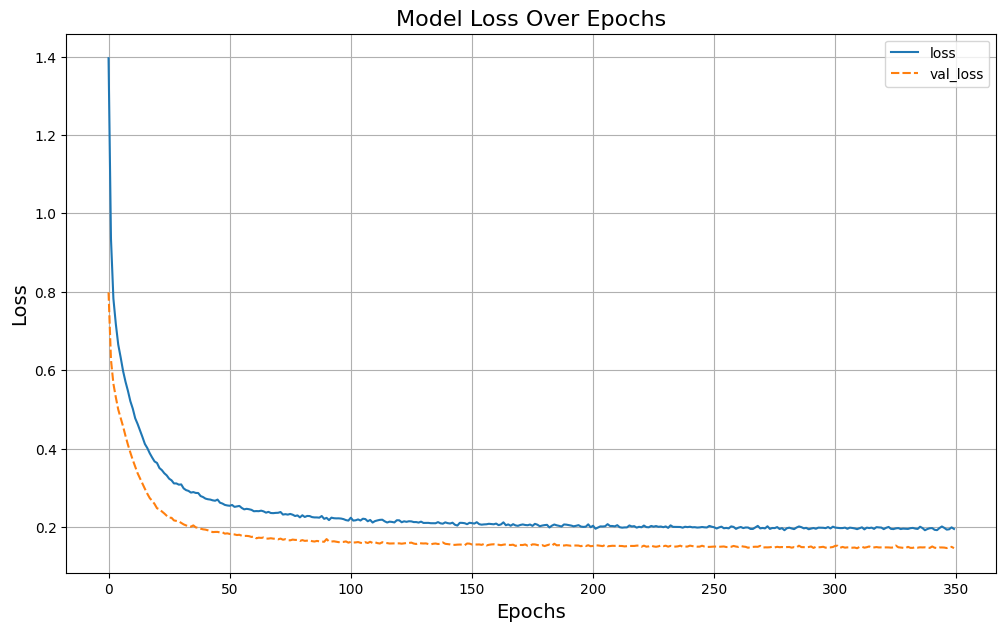

In [80]:
# Visualizing the Loss and Validation Loss

plt.figure(figsize=(12, 7))
sns.lineplot(data=loss_df[['loss', 'val_loss']])
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.show()


<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;"> Training loss and validation loss drop smoothly, it shows that the model is learning well and there is not overfitting problem. </p>
</div>

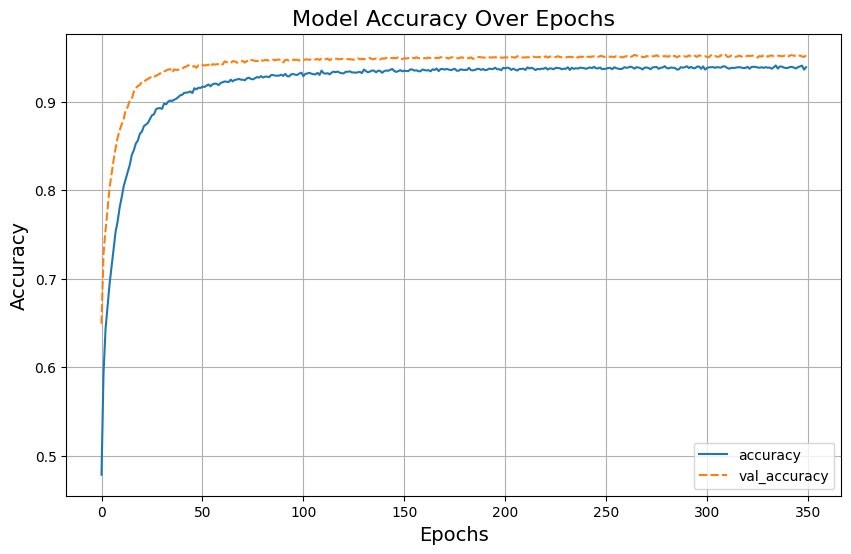

In [81]:
# Visualizing the Accuracy and Validation Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=loss_df[['accuracy', 'val_accuracy']])
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()


<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;"> Training accuracy Validation accuracy rise smoothly, it means that model is learning well, the learning rate got stabilize after 50 epoch</p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Evaluation of the Model 
</h1

In [82]:
# Compare the final model loss/accuracy/evaluation values
print("Test data evaluation:\n")
test_loss, test_accuracy = model.evaluate(X_test, y_test , verbose=0)
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Print the final training loss and accuracy
print(f"Train loss: {train_loss}")
print(f"Train accuracy: {train_accuracy}\n")
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test data evaluation:

Train loss: 0.1478315144777298
Train accuracy: 0.9537143707275391

Test loss: 0.150557741522789
Test accuracy: 0.9539434909820557


In [83]:
# Predict the the test data
predictions = model.predict(X_test)
# Convert the predictions to  from probabilities to class labels
predictions = np.argmax(predictions, axis=1)

# convert the y_test to class labels
y_test = np.argmax(y_test ,axis=1)



267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


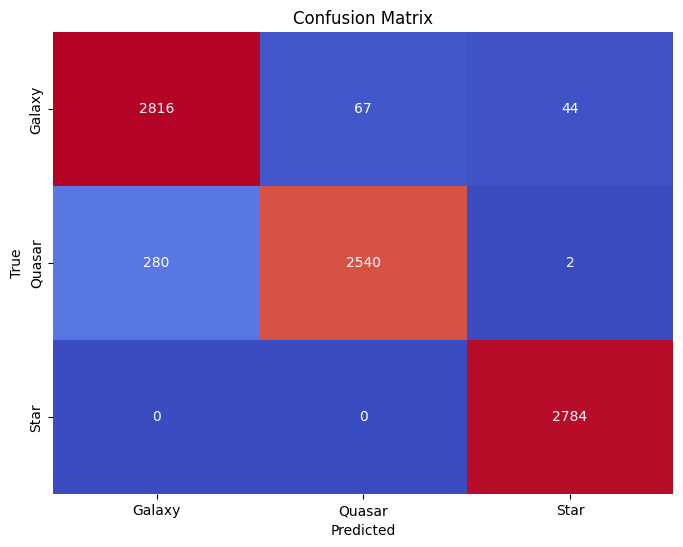

In [84]:
# Visualizing the confusion matrix 
# create a label list for the class values
label_list = ['Galaxy', 'Quasar', 'Star']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=label_list, yticklabels=label_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;"> ANN Classification model has great performance with star like  RandomForest and XGBoost.</p>
</div>


In [85]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))


              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2927
           1       0.97      0.90      0.94      2822
           2       0.98      1.00      0.99      2784

    accuracy                           0.95      8533
   macro avg       0.96      0.95      0.95      8533
weighted avg       0.96      0.95      0.95      8533


Model overall accuracy: 95.39%



<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;"> ANN Classification model has acceptable  accuracy and  well performance for all class' values.</p>
</div>



In [86]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, to_categorical(predictions), multi_class='ovo')
roc_auc

0.9655370209712016

In [87]:
df.head()

,alpha,delta,cam_col,class,redshift,plate,MJD,photometric_filters
0,135.69,32.49,2,0,0.63,5812,56354,21.43
1,144.83,31.27,5,0,0.78,10445,58158,22.92
2,142.19,35.58,2,0,0.64,4576,55592,22.01
3,338.74,-0.40,3,0,0.93,9149,58039,21.77
4,345.28,21.18,3,0,0.12,6121,56187,17.39


In [88]:
# save the model for UI 
model.save('classification_ann.keras')

In [89]:
# let's try with some new data that we have not seen before
new_tester  = {
    "alpha": 135.56,
    "delta": 32.28,
    "cam_col": 2,
    "redshift": 0.63,
    "plate": 5812,
    "MJD": 56354,
    "photometric_filters": 21.44
}

# convert the dictionary to a pandas dataframe
new_tester = pd.DataFrame([new_tester])
new_tester = scaler.transform(new_tester)
predict = model.predict(new_tester)
predict_class = categories[np.argmax(predict)]

# create  label for the predicted class
# 0 = Galaxy, 1 = Quasar, 2 = Star
label = ['Galaxy', 'Quasar', 'Star'] 
label[predict_class] 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'Galaxy'

In [90]:
# save the scaler for the GUI 
joblib.dump(scaler, 'classification_scaler.pkl')

['classification_scaler.pkl']